# 95-791 Data Mining (Fall 2021) 
## Name: Abdullah Ahmad


### Topics covered in this Lab:
- Data Processing
- Linear regression
- Multiple linear regression

### Changing the author field and file name.

 (a) Change the `author:` field on the Jupyter Notebook from Your Name Here to your own name.

 (b) Rename this file to "Lab1_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [1]:
# Packages we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline
plt.style.use('seaborn-white')

### 1. Warm-up: Data Processing 

In this notebook we'll be working with a Graduate Admissions Dataset from [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions). Please downaload the dataset from Canvas. Here's a description of the variables found in the dataset:

* Serial Number 
* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* SOP - Statement of Purpose ( out of 5 )
* LOR - Letter of Recommendation Strength ( out of 5 )
* CGPA - Undergraduate GPA ( out of 10 )
* Research - Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

Acknowledgements
*Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019*

##### 1) a) Begin by reading the file and save it in dataframe called `df_admissions`. Print the first five rows of the dataframe.

In [2]:
df_admissions = pd.read_csv ('Admission_Predict_Modif.csv')
print(df_admissions)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1      337.0        118.0                4.0  4.5   4.5  9.65   
1             2      324.0        107.0                4.0  4.0   4.5  8.87   
2             3      316.0        104.0                3.0  3.0   3.5  8.00   
3             4      322.0        110.0                3.0  3.5   2.5  8.67   
4             5      314.0        103.0                2.0  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
499         500      327.0        113.0                4.0  4.5   4.5  9.04   
500         501      267.0          NaN                NaN  4.0   4.0  9.00   
501         502      365.0         98.0                4.0  NaN   NaN  8.00   
502         503      367.0         90.0                NaN  5.0   5.0   NaN   
503         504        NaN         91.0                NaN  3.0   NaN  7.00   

     Research  Chance of Admit   
0         1.0    

**1) b) Are there any missing values in the dataset? If so, how many rows contain missing values and what are the data types for each of columns?**

In [3]:
df_admissions.info()
# No of rows wit null values 
sum([True for idx,row in df_admissions.iterrows() if any(row.isnull())])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         504 non-null    int64  
 1   GRE Score          503 non-null    float64
 2   TOEFL Score        503 non-null    float64
 3   University Rating  501 non-null    float64
 4   SOP                503 non-null    float64
 5   LOR                502 non-null    float64
 6   CGPA               503 non-null    float64
 7   Research           502 non-null    float64
 8   Chance of Admit    502 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 35.6 KB


4

In [4]:
# No of null values in each variable column  
df_admissions.isnull().sum(axis=0)

Serial No.           0
GRE Score            1
TOEFL Score          1
University Rating    3
SOP                  1
LOR                  2
CGPA                 1
Research             2
Chance of Admit      2
dtype: int64

--> Therer are a total of 13 missing values. Therer are 4 rows with missing values University contains the most null values of 3. The data type of the column is a float.In our example we will drop null values.

**1) c) There are a few methodologies to deal with missing values. What makes sense in this case? Deal with the missing values and print your clean dataframe.**

In [5]:
df_admissions_clean = df_admissions.dropna()
# No of null values in each variable column  
df_admissions_clean.isnull().sum(axis=0)


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**1)d) Which of these variables could be our response variable?  What does this response variable refer to?  How many input variables do we have?**

--> It makes sense that Chance of Admit is our response/target variables. We have 7 input variables. We wont include serial no as a variable 



**1)e) We need two more steps before we do any modeling on our dataset: i) remove any irrelevant columns, ii)make sure the names of the columns do not have any spaces or periods. You can replace the spaces with '' or '_'. Print your cleaned dataset**


In [6]:
#Remove space and decimal charecters from the row name
df_admissions_clean.columns = df_admissions_clean.columns.str.replace(' ', '')
df_admissions_clean.columns = df_admissions_clean.columns.str.replace('.', '')
#Removing serial NO 
df_admissions_clean = df_admissions_clean.drop(['SerialNo'],axis=1)
df_admissions_clean.head()

<ipython-input-6-bcec2d99012c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_admissions_clean.columns = df_admissions_clean.columns.str.replace('.', '')


,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


**1)f)With your cleaned dataset draw a boxplot of `Chance of Admit` per `University Rating`. What initial finding does this plot give you?**


<AxesSubplot:xlabel='UniversityRating', ylabel='ChanceofAdmit'>

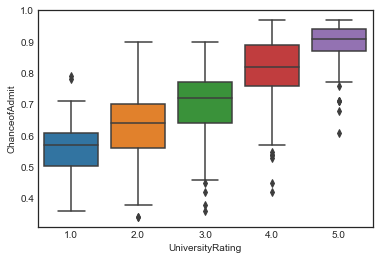

In [7]:
sns.boxplot(x="UniversityRating", y="ChanceofAdmit",data=df_admissions_clean)


--> The higher the rating of the University, the smaller is the range of chance of admit



**1)g) Do the same as in question 1)f) but this time using `GRE Scores` instead of `Chance of admit`. Explain your findings.**

<AxesSubplot:xlabel='UniversityRating', ylabel='GREScore'>

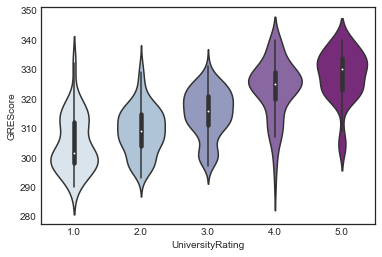

In [8]:
sns.violinplot(x = 'UniversityRating', y = 'GREScore', data = df_admissions_clean, palette = 'BuPu')

--> Higher the university is ranked the higher is the GRE score

### 2. Simple Linear Regression with the Admissions data.

> For this portion of the Lab you might want to have the textbook ( ISRL - An Introduction to Statistical Learning) open (sections 3.1, 3.2 and 3.2) as you go through the exercises.


**To model a linear regression out of this data we will need additional libraries. The main libraries we will be using are [`statsmodels`](https://www.statsmodels.org/stable/index.html) and [`sckit-learn`](https://scikit-learn.org/stable/).** 

We will also need to visualize our regression models, therefore we will import seaborn and pyplot as well. You probably have some experience creating visualizations with these libraries.


In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We will first be using `statsmodels` and a [formula notation](https://www.statsmodels.org/dev/example_formulas.html). This is an easier first approach. Look at the example below to see how this works for linear regressions.

> `linear_regression_model = smf.ols('Y ~ X', dataset).fit()`

**2)a) Use the `smf.ols()` function to a fit linear regression of `Chance of Admit` on `GRE Score`.  Save the output of your linear regression in a variable called `lm`.**

In [10]:
lm = smf.ols(formula='ChanceofAdmit ~ GREScore', data=df_admissions_clean).fit()

**2)b) Use the `summary()` function on your `lm` variable to get a print-out of your regression results**



In [11]:

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceofAdmit   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     952.5
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          1.09e-117
Time:                        13:59:52   Log-Likelihood:                 537.30
No. Observations:                 500   AIC:                            -1071.
Df Residuals:                     498   BIC:                            -1062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4828      0.104    -23.896      0.000      -2.687      -2.279
GREScore       0.0101      0.000     30.862      0.000       0.009       0.011
==============================================================================
Omnibus:                       61.111   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.883
Skew:                          -0.822   Prob(JB):                     1.84e-20
Kurtosis:                       4.288   Cond. No.                     8.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Understanding a few of the values given by the summary table:**

* R-squared (coefficient of determination) - the strength of the relationship between the model and the dependent variables. This measures the model's quality, meaning the closer this number is to 1.0 the better the model is. Statistically speaking, R-squared is equivalent to the fraction of the variance of *y* that can be explained by the regression model. For example, if R<sup>2</sup> is 0.95, it means that 95% of the variance of *y* can be explained by the model, and the other 5% is unexplained (e.g. sample variability).

* R<sup>2</sup> adjusted - is even better because it accounts for the number of variables in the model, aka it is more realistic.

* F statistic - model is significant or insignificant. It is mostly used for models that use least squares for fitting (or some variance of least squares).

* p-value - if this value is < 0.05 it indicates that the model is statistically significant (falls in a 95% confidence interval). 

**2)c) Uncomment the line below to get a nice printout of the coefficients table**



In [12]:
results_reg = pd.read_html(lm.summary().tables[1].as_html(), header=0, index_col=0)[0]
print(results_reg)


             coef  std err       t  P>|t|  [0.025  0.975]
Intercept -2.4828    0.104 -23.896    0.0  -2.687  -2.279
GREScore   0.0101    0.000  30.862    0.0   0.009   0.011


**2)d)  Call `params` on `lm` to explore what values this linear model contains. What is the estimated Intercept?  What is the coefficient of `GREScore` in the model?  Interpret this coefficient.**


In [13]:
lm.params


Intercept   -2.482815
GREScore     0.010126
dtype: float64

--> The value of intercept is -2.482815. The coefficient of GREScore is 0.010126, meaning it with every 1 unit increase in GreScore the chance of admit increases by 0.010126 units

Seaborn can plot the predictions produced by our fitted model (previous questions) or can use [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html) to fit a linear regression on the data provided.

**2)e) Use seaborn to overlay a linear regression line (with regplot()) on a scatterplot of `ChanceofAdmit` vs. `GREScore`.  Edit the `xlab` and `ylab` arguments to produce more meaningful axis labels.  Does the linear model appear to fit the data well?  Explain.**



[Text(0.5, 0, 'GRE Scores (out of 340)'),
 Text(0, 0.5, 'Change of being admitted (0-1)')]

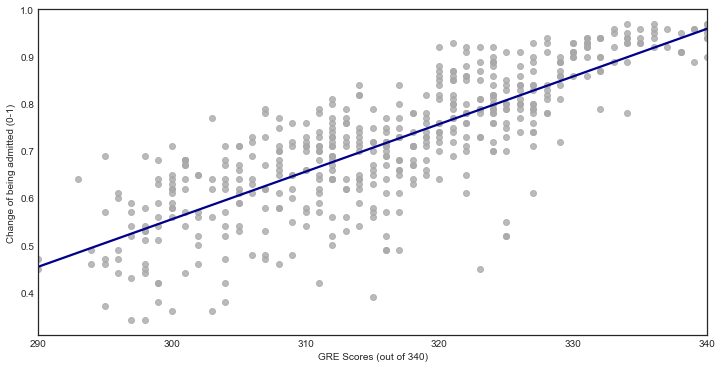

In [14]:

plt.figure(figsize=(12,6))
lmplot = sns.regplot(x="GREScore",y="ChanceofAdmit",data=df_admissions_clean, ci=None, order=1, 
            scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"})
lmplot.set(xlabel='GRE Scores (out of 340)', 
           ylabel='Change of being admitted (0-1)')

--> The linear model seems like a good fit to the data in the GRE Score. However segments of the data appear to be non-linear or out of reach for our linear regression.


---

### 3. Multiple Linear Regression with the Admission Data



**3)a) Following the example in part 2)e) of this lab, construct a scatterplot of `ChanceofAdmit` versus `TOEFLScores`.  Make sure to specify meaningful x and y axis names.  Overlay a linear regression line.  Does a linear relationship appear to hold between the two variables?**

[Text(0.5, 0, 'TOEFL Score'), Text(0, 0.5, 'Change of being admitted (0-1)')]

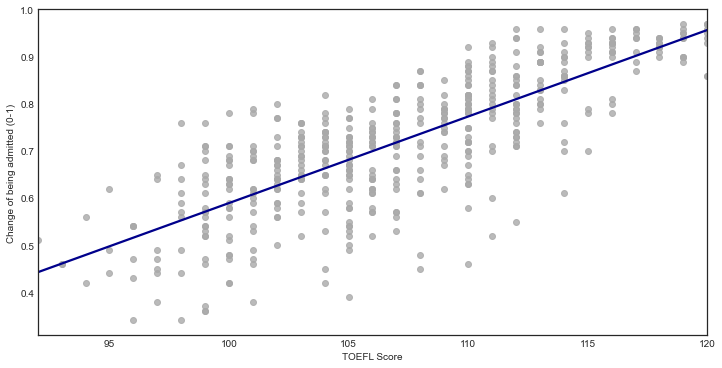

In [15]:
plt.figure(figsize=(12,6))
lmplot = sns.regplot(x="TOEFLScore",y="ChanceofAdmit",data=df_admissions_clean, ci=None, order=1, 
            scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"})
lmplot.set(xlabel='TOEFL Score', 
           ylabel='Change of being admitted (0-1)')

--> The regression line seems fince, however the data is more varried on each side of the line when comaored to GRE score

**3)b) Use the `smf.ols()` command to a fit a linear regression of `ChanceofAdmit` on `GREScores` and `TOEFLScores`.  Save your regression model in a variable called `lm_gt`.**

*Note: You can add variables with a + sign.*

In [16]:
lm_gt = smf.ols('ChanceofAdmit ~ GREScore + TOEFLScore', df_admissions_clean).fit()
lm_gt.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceofAdmit   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     590.3
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          5.16e-132
Time:                        13:59:52   Log-Likelihood:                 574.16
No. Observations:                 500   AIC:                            -1142.
Df Residuals:                     497   BIC:                            -1130.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1803      0.102    -21.284      0.000      -2.382      -1.979
GREScore       0.0061      0.001     11.300      0.000       0.005       0.007
TOEFLScore     0.0090      0.001      8.886      0.000       0.007       0.011
==============================================================================
Omnibus:                       74.774   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.617
Skew:                          -0.926   Prob(JB):                     2.37e-27
Kurtosis:                       4.568   Cond. No.                     9.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3)c)Did your model in 3)b) improve compared to 2)b)?**

--> The model improved. R square improved from  of 0.657 to 0.704

**(d)  What is the coefficient of `GREScore` in your model?  Interpret this coefficient.**



In [17]:
print(lm_gt.params)

Intercept    -2.180268
GREScore      0.006135
TOEFLScore    0.008960
dtype: float64


--> The coefficient of GRE Scores is 0.0061.



**(e) Use `ChanceofAdmit ~ GREScore + TOEFLScore + SOP + Research...` syntax to fit a model regressing `ChanceofAdmit` on all the other variables. You can list all the other columns manually, but that would take time and generate errors. Instead try to join all the other columns names (except medv) into a single string separating them by `+`. After your linear model is calculated print out its `summary()`.**


In [18]:
all_columns = "+".join(df_admissions_clean.columns.difference(["ChanceofAdmit"]))
multi_formula = "ChanceofAdmit ~ " + all_columns
lm_all = smf.ols(formula=multi_formula, data=df_admissions_clean).fit()
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceofAdmit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          8.21e-180
Time:                        13:59:52   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2757      0.104    -12.232      0.000      -1.481      -1.071
CGPA                 0.1184      0.010     12.198      0.000       0.099       0.137
GREScore             0.0019      0.001      3.700      0.000       0.001       0.003
LOR                  0.0169      0.004      4.074      0.000       0.009       0.025
Research             0.0243      0.007      3.680      0.000       0.011       0.037
SOP                  0.0016      0.005      0.348      0.728      -0.007       0.011
TOEFLScore           0.0028      0.001      3.184      0.002       0.001       0.004
UniversityRating     0.0059      0.004      1.563      0.119      -0.002       0.013
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(f) Think about what the variables in the data set mean.  Do the signs of all of the coefficient estimates make sense?  Are there any that do not?  For the ones that do not, are the coefficients statistically significant (do they have p-value < 0.05)?**



In [19]:
results_regress = pd.read_html(lm_all.summary().tables[1].as_html(), header=0, index_col=0)[0]
print("Variables with positive signs")
print(results_regress[results_regress['coef'] > 0])
print("\nVariables with negative signs")
print(results_regress[results_regress['coef'] < 0])

Variables with positive signs
                    coef  std err       t  P>|t|  [0.025  0.975]
CGPA              0.1184    0.010  12.198  0.000   0.099   0.137
GREScore          0.0019    0.001   3.700  0.000   0.001   0.003
LOR               0.0169    0.004   4.074  0.000   0.009   0.025
Research          0.0243    0.007   3.680  0.000   0.011   0.037
SOP               0.0016    0.005   0.348  0.728  -0.007   0.011
TOEFLScore        0.0028    0.001   3.184  0.002   0.001   0.004
UniversityRating  0.0059    0.004   1.563  0.119  -0.002   0.013

Variables with negative signs
             coef  std err       t  P>|t|  [0.025  0.975]
Intercept -1.2757    0.104 -12.232    0.0  -1.481  -1.071


--> Your answer here

**(g) Compute a correlation matrix for the variables that had positive coefficients in the multilinear regression model previously calculated. You can use [pairplots](https://seaborn.pydata.org/generated/seaborn.pairplot.html) or [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) in Seaborn to plot a correlation matrix. Briefly explain why these plots are useful.**

In [20]:
positive_coefs = list(results_regress[results_regress['coef'] > 0].index)
positive_coefs

['CGPA',
 'GREScore',
 'LOR',
 'Research',
 'SOP',
 'TOEFLScore',
 'UniversityRating']

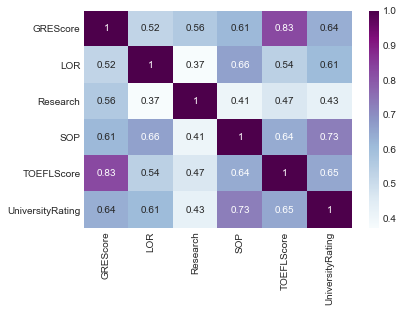

In [21]:
positive_coefs = list(results_regress[results_regress['coef'] > 0].index)
positive_coefs.pop(0)
sns.heatmap(df_admissions_clean[positive_coefs].corr(), annot=True, cmap="BuPu")
plt.show()

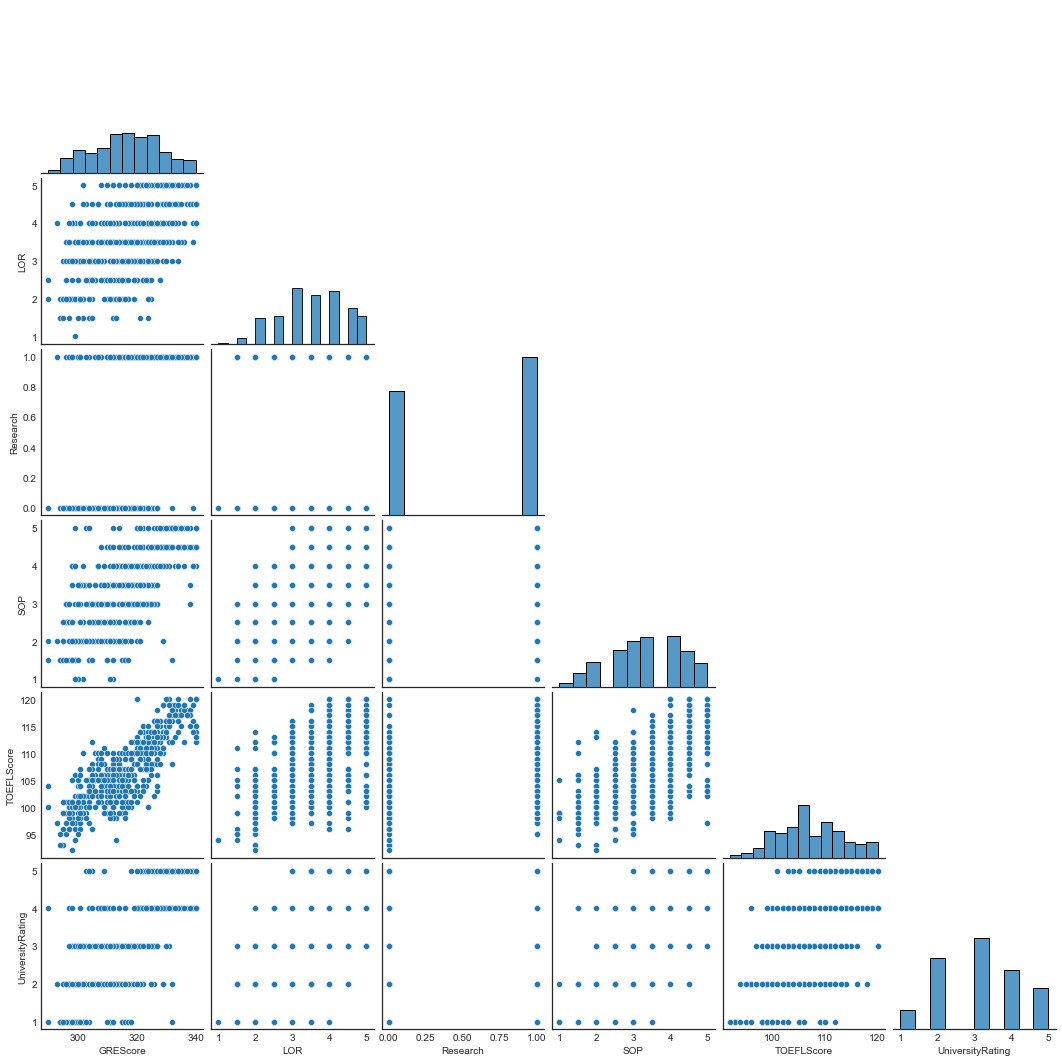

In [22]:
sns.pairplot(df_admissions_clean[positive_coefs], corner=True)
plt.show()

--> Correlation is related to regression models because both concepts deal with relationships between variables. Correlation coefficient values are between -1 and +1, where a +1 indicate a strong/perfect, positive correlation, while a -1 indicate a strong negative correlation. This relation is linear. A value of 0 in the correlation coefficient indicates no correlation at all between variables. Be careful, correlation does not imply causation!

